# OSEMN Exercises

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np

1\. Create a random list of number and then save it to a text file named "simple_data.txt"

In [2]:
x = np.random.random(100)
np.savetxt('simple_data.txt', x)

2\. Create a random matrix of 5x5 and then save it to a text file named "data.txt"

In [3]:
x = np.random.random((5,5))
np.savetxt('data.txt', x)

3\. Load the saved txt file of point 2 and convert it to a csv file (by hand)

In [4]:
x = np.loadtxt('data.txt')
def to_csv(input_file, output_file):
    with open(input_file) as file, open(output_file, 'w') as out:
        for line in file:
            out.write(line.replace(' ', ',') if not line.startswith('#') else line)
to_csv('data.txt', 'data.csv')

4\. load the binary file named *credit_card.dat* and convert the data into the real credit-card number.
Each line correspond to a credit card number.
Each character is composed by 6 bit (even the space) and the last 4 bit are just a padding

**hint**: use the `chr()` function to convert a number to a char

In [5]:
from pprint import pprint
def read_credit_card(input_file):
    res = []
    with open(input_file) as file:
        for line in file:
            if len(line[:-5]) % 6 == 0 and len(line[:-5]) >= 6:
                nums = np.array_split(list(line[:-5]), len(line[:-5]) / 6)
                nums = ''.join([chr(int(''.join(n), 2)) for n in nums])
                res.append(nums)
    return res

pprint(read_credit_card('credit_card.dat'))


['7648 5673 3775 2271',
 '3257 8247 3354 2266',
 '2722 0001 4011 6652',
 '0661 3063 3742 3150',
 '0432 1608 1462 4742',
 '5827 2027 8785 7303',
 '5774 8528 2087 1117',
 '8140 1210 6352 2845',
 '5764 1133 7301 7100',
 '6456 1737 4126 6726',
 '1228 8631 7382 0000',
 '7051 0160 5374 3166',
 '0618 3587 1630 6376',
 '1545 5454 7444 5636',
 '6735 3116 3202 6834',
 '7287 5011 1547 8413',
 '7033 2607 3328 4200',
 '2568 5244 1874 5024',
 '1684 2253 7570 7118',
 '0672 2576 0575 6631',
 '6332 8353 8787 1340',
 '1813 3361 1175 4211',
 '2477 6450 8840 2368',
 '5512 3505 2563 1326',
 '3083 7882 0621 0025',
 '4521 5148 8045 0334',
 '7563 3654 8713 5787',
 '8324 2664 0476 5561',
 '0565 2504 7168 3510',
 '5107 5507 1767 0738',
 '2462 1821 2448 1443',
 '2788 0638 6861 6554',
 '5851 5873 5474 0547',
 '0670 1004 4013 2655',
 '5874 5506 3048 0806',
 '2805 5401 8462 1260',
 '5083 8406 6310 1862',
 '1076 1445 3013 2266',
 '8440 4804 4844 5277',
 '4758 6141 0686 1387',
 '7586 0675 0315 2568',
 '2544 1258 7432

5\. Load the file "user_data.json", filter the data by the "CreditCardType" field equals to "American Express". Than save the data a to CSV.

In [6]:
import json
import csv
with open('user_data.json') as file:
    user_data = json.load(file)

data = list(filter(lambda x: x['CreditCardType'] == 'American Express', user_data))
with open('user_data.csv', 'w') as file:
    fieldnames = list(data[0].keys())
    writer = csv.DictWriter(file, fieldnames=fieldnames)
    writer.writeheader()
    for d in data:
        writer.writerow(d)

6\. Load the file from this url: [https://www.dropbox.com/s/7u3lm737ogbqsg8/mushrooms_categorized.csv?dl=1](https://www.dropbox.com/s/7u3lm737ogbqsg8/mushrooms_categorized.csv?dl=1) with Pandas. 
+ Explore the data (see the info of the data)
+ Draw the istogram of the 'class' field. Decribe wath yuou see


/bin/bash: /home/giacomo/Programs/miniconda3/lib/libtinfo.so.6: no version information available (required by /bin/bash)
mkdir: cannot create directory ‘/home/giacomo/data/’: File exists
             class    cap-shape  cap-surface    cap-color      bruises  \
count  8124.000000  8124.000000  8124.000000  8124.000000  8124.000000   
mean      0.482029     3.348104     1.827671     4.504677     0.415559   
std       0.499708     1.604329     1.229873     2.545821     0.492848   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     2.000000     0.000000     3.000000     0.000000   
50%       0.000000     3.000000     2.000000     4.000000     0.000000   
75%       1.000000     5.000000     3.000000     8.000000     1.000000   
max       1.000000     5.000000     3.000000     9.000000     1.000000   

              odor  gill-attachment  gill-spacing    gill-size   gill-color  \
count  8124.000000      8124.000000   8124.000000  8124.000000  812

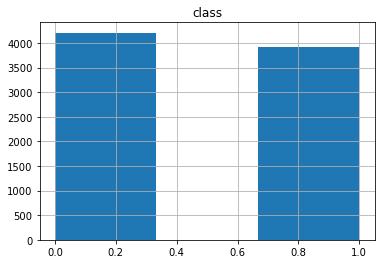

In [7]:
!mkdir ~/data/
import os 
import pandas as pd

if not os.path.exists('data/mushrooms_categorized.csv'):
    !wget https://www.dropbox.com/s/7u3lm737ogbqsg8/mushrooms_categorized.csv?dl=1 -P ~/data/ -O ~/data/mushrooms_categorized.csv


df = pd.read_csv('~/data/mushrooms_categorized.csv')
print(df.describe())
print(df.index, df.columns)

hist = df.hist(bins=3, column='class')

7\. Load the remote file [https://www.dropbox.com/s/vkl89yce7xjdq4n/regression_generated.csv?dl=1](https://www.dropbox.com/s/vkl89yce7xjdq4n/regression_generated.csv?dl=1) with Pandas and plot a scatter plot all possible combination of the following fields:
    
  + features_1
  + features_2
  + features_3

             label   features_1   features_2   features_3   features_4  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean     -0.942564    -0.006400     0.013348     0.005297     0.000184   
std     203.282356     1.006368     0.996602     1.003514     1.006999   
min    -660.492553    -3.718751    -3.613474    -4.242018    -3.472173   
25%    -134.575171    -0.683980    -0.663803    -0.686082    -0.700964   
50%      -4.879239     0.011044    -0.006613     0.024809     0.013137   
75%     131.623753     0.674461     0.680902     0.692081     0.692169   
max     697.402230     3.434959     3.123339     2.764707     3.215090   

        features_5   features_6   features_7   features_8   features_9  ...  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000  ...   
mean     -0.000480    -0.017532    -0.020000     0.000977    -0.012128  ...   
std       0.989669     0.979118     1.024935     0.995729     1.003996  ...   
min      -3.19273

<IPython.core.display.Javascript object>


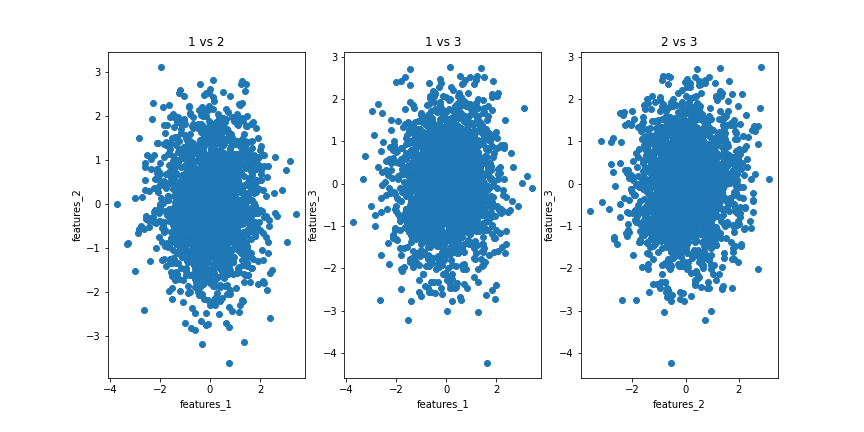

In [8]:
%matplotlib notebook 
import matplotlib.pyplot as plt

if not os.path.exists('data/regression_generated.csv'):
    !wget https://www.dropbox.com/s/vkl89yce7xjdq4n/regression_generated.csv?dl=1 -P ~/data/ -O ~/data/regression_generated.csv


df = pd.read_csv('~/data/regression_generated.csv')
print(df.describe())
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(12, 6))
ax1.set_xlabel('features_1')
ax1.set_ylabel('features_2')
ax1.set_title('1 vs 2')
ax1.scatter(df.features_1, df.features_2)
ax2.set_xlabel('features_1')
ax2.set_ylabel('features_3')
ax2.set_title('1 vs 3')
ax2.scatter(df.features_1, df.features_3)
ax3.set_xlabel('features_2')
ax3.set_ylabel('features_3')
ax3.set_title('2 vs 3')
ax3.scatter(df.features_2, df.features_3)

plt.show()

8\. Load the same file of point 6, and convert the file to json with Pandas.

In [9]:
if not os.path.exists('data/mushrooms_categorized.csv'):
    !wget https://www.dropbox.com/s/7u3lm737ogbqsg8/mushrooms_categorized.csv?dl=1 -P ~/data/ -O ~/data/mushrooms_categorized.csv


df = pd.read_csv('~/data/mushrooms_categorized.csv')
df.to_json('~/data/mushrooms_categorized.json')
df = pd.read_json('~/data/mushrooms_categorized.json')

print(df.describe())
print(df.index, df.columns)



             class    cap-shape  cap-surface    cap-color      bruises  \
count  8124.000000  8124.000000  8124.000000  8124.000000  8124.000000   
mean      0.482029     3.348104     1.827671     4.504677     0.415559   
std       0.499708     1.604329     1.229873     2.545821     0.492848   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     2.000000     0.000000     3.000000     0.000000   
50%       0.000000     3.000000     2.000000     4.000000     0.000000   
75%       1.000000     5.000000     3.000000     8.000000     1.000000   
max       1.000000     5.000000     3.000000     9.000000     1.000000   

              odor  gill-attachment  gill-spacing    gill-size   gill-color  \
count  8124.000000      8124.000000   8124.000000  8124.000000  8124.000000   
mean      4.144756         0.974151      0.161497     0.309207     4.810684   
std       2.103729         0.158695      0.368011     0.462195     3.540359   
min       0.00000